### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as sklern

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [5]:
X[1].min(), X[1].max()

(0, 10)

In [6]:
X[2].min(), X[2].max()

(450, 2000)

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [9]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

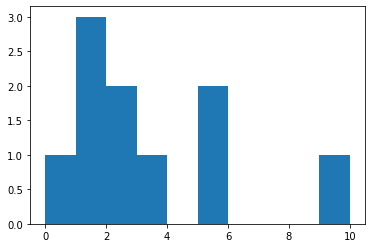

In [10]:
plt.hist(X[1])
plt.show()

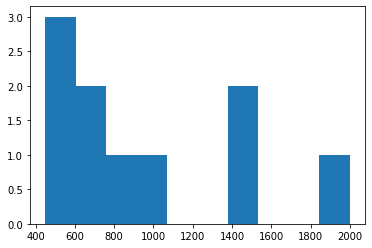

In [11]:
plt.hist(X[2])
plt.show()

In [12]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [13]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

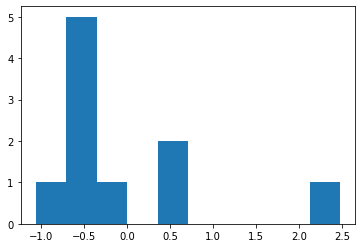

In [14]:
plt.hist(X_st[1])
plt.show()

In [15]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sklern.StandardScaler() #Стандартизайия
sklern.MinMaxScaler() #Нормализация

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
X_st[2] = calc_std_fit(X[2])

In [29]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [30]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [31]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [32]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.20433607  5.68108014  2.72190831  3.95621088] 82.04180789631718
200 [55.53245229  5.80060501  2.17311291  4.46290064] 27.01690959790185
300 [56.37168425  5.88747689  1.70756609  4.85655308] 25.67756941024907
400 [56.48298282  5.96094242  1.32713251  5.17564704] 25.407125192081445
500 [56.49774319  6.02233219  1.01654309  5.43481193] 25.238329593480593
600 [56.4997007   6.07320474  0.76310034  5.64555056] 25.12636266786712
700 [56.49996031  6.11513215  0.55635846  5.81704854] 25.05196608283028
800 [56.49999474  6.14956262  0.38775002  5.95668842] 25.00253037553378
900 [56.4999993   6.1777686   0.25026225  6.07043015] 24.96968067139538
1000 [56.49999991  6.2008381   0.13816265  6.16310004] 24.94785220071277


array([56.49999991,  6.2008381 ,  0.13816265,  6.16310004])

In [33]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [34]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.5106203   6.31269069 -0.36443655  6.5844979 ] 11.289384912263394
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289182006695402
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

L1 регуляризация

L2 регуляризация

In [35]:
# lambda = lambda_/2

In [36]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [37]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [38]:
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [39]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514797
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565497
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007856
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [40]:
iterations = 1000
start = 1e-4
n = W.shape[0]
W_matrix = np.zeros((iterations, n))
W_matrix.shape

(1000, 4)

In [43]:
scaler = MinMaxScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
for i in range(iterations):
    W_matrix[i] = eval_model_reg2(x_scaled, y, iterations=5000, alpha=1e-2, lambda_=start *(1 + i * 10))
W_matrix[-1]

array([-6.70073307e-04,  9.51675877e-02,  3.76778460e+01,  2.86241484e-02])

In [45]:
lambda_scale = np.arange(start, start * iterations + start, start)

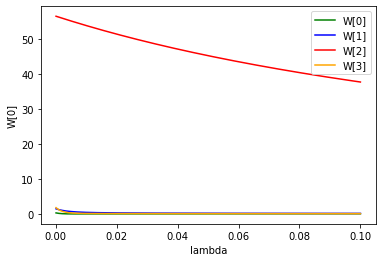

In [52]:
plt.xlabel('lambda')
plt.ylabel('W[0]')
plt.plot(lambda_scale, W_matrix[:, 0], color='g', label = 'W[0]')
plt.plot(lambda_scale, W_matrix[:, 1], color='b', label = 'W[1]')
plt.plot(lambda_scale, W_matrix[:, 2], color='r', label = 'W[2]')
plt.plot(lambda_scale, W_matrix[:, 3], color='orange', label = 'W[3]')
plt.legend()

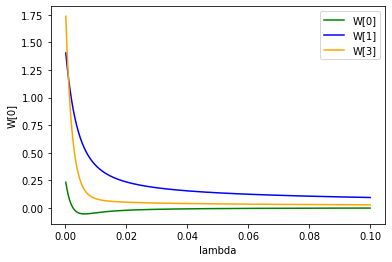

In [53]:
plt.xlabel('lambda')
plt.ylabel('W[0]')
plt.plot(lambda_scale, W_matrix[:, 0], color='g', label = 'W[0]')
plt.plot(lambda_scale, W_matrix[:, 1], color='b', label = 'W[1]')
plt.plot(lambda_scale, W_matrix[:, 3], color='orange', label = 'W[3]')
plt.legend()

Для $W_2$ рисуем отдельный график - шкала другая, чтобы нагляднее было.

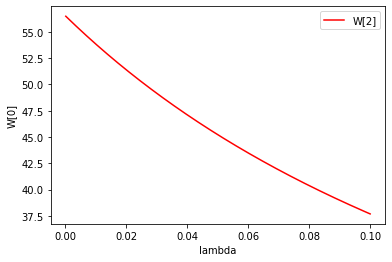

In [54]:
plt.xlabel('lambda')
plt.ylabel('W[0]')
plt.plot(lambda_scale, W_matrix[:, 2], color='r', label = 'W[2]')
plt.legend()

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Искал в интернете про применение одновременно нормализации и стандартизации. Ничего не нашел. Но мне кажется, что смысла нет применять одновременно.

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [55]:
def eval_model_reg3(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [56]:
W = eval_model_reg3(x_scaled, y, iterations=10000, alpha=1e-2, lambda_=.02)
W

1000 [ 0.24996624  0.09218603 56.48888399  1.3971896 ] 160.2435912394057
2000 [-1.60439610e-04  1.82142038e-01  5.64888653e+01  1.23443427e+00] 160.24024561227944
3000 [1.13853791e-04 2.72089271e-01 5.64888161e+01 1.07168011e+00] 160.23824411669895
4000 [-1.12183769e-05  3.62028321e-01  5.64887657e+01  9.08926980e-01] 160.23624297196665
5000 [-1.35656007e-04  4.51959192e-01  5.64887154e+01  7.46174864e-01] 160.23424430287054
6000 [1.40540865e-04 5.41881883e-01 5.64886650e+01 5.83423767e-01] 160.2322438114209
7000 [1.73722030e-05 6.31796396e-01 5.64886147e+01 4.20673688e-01] 160.23024364655484
8000 [-1.05162032e-04  7.21702731e-01  5.64885643e+01  2.57924628e-01] 160.22824380822118
9000 [-2.27061878e-04  8.11600889e-01  5.64885140e+01  9.51765861e-02] 160.22624644524925
10000 [5.16470892e-05 9.01490796e-01 5.64884244e+01 2.94462594e-05] 160.2239962142306


array([5.16470892e-05, 9.01490796e-01, 5.64884244e+01, 2.94462594e-05])